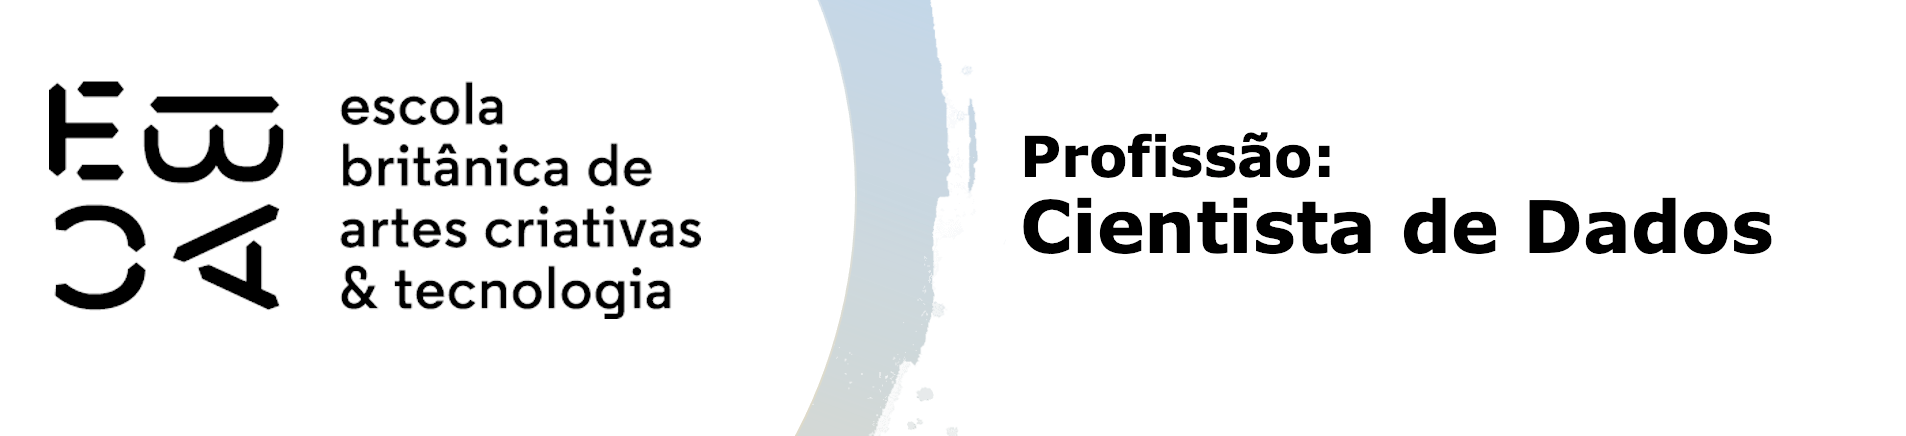

# Métodos hierárquicos de agrupamento - Tarefa

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

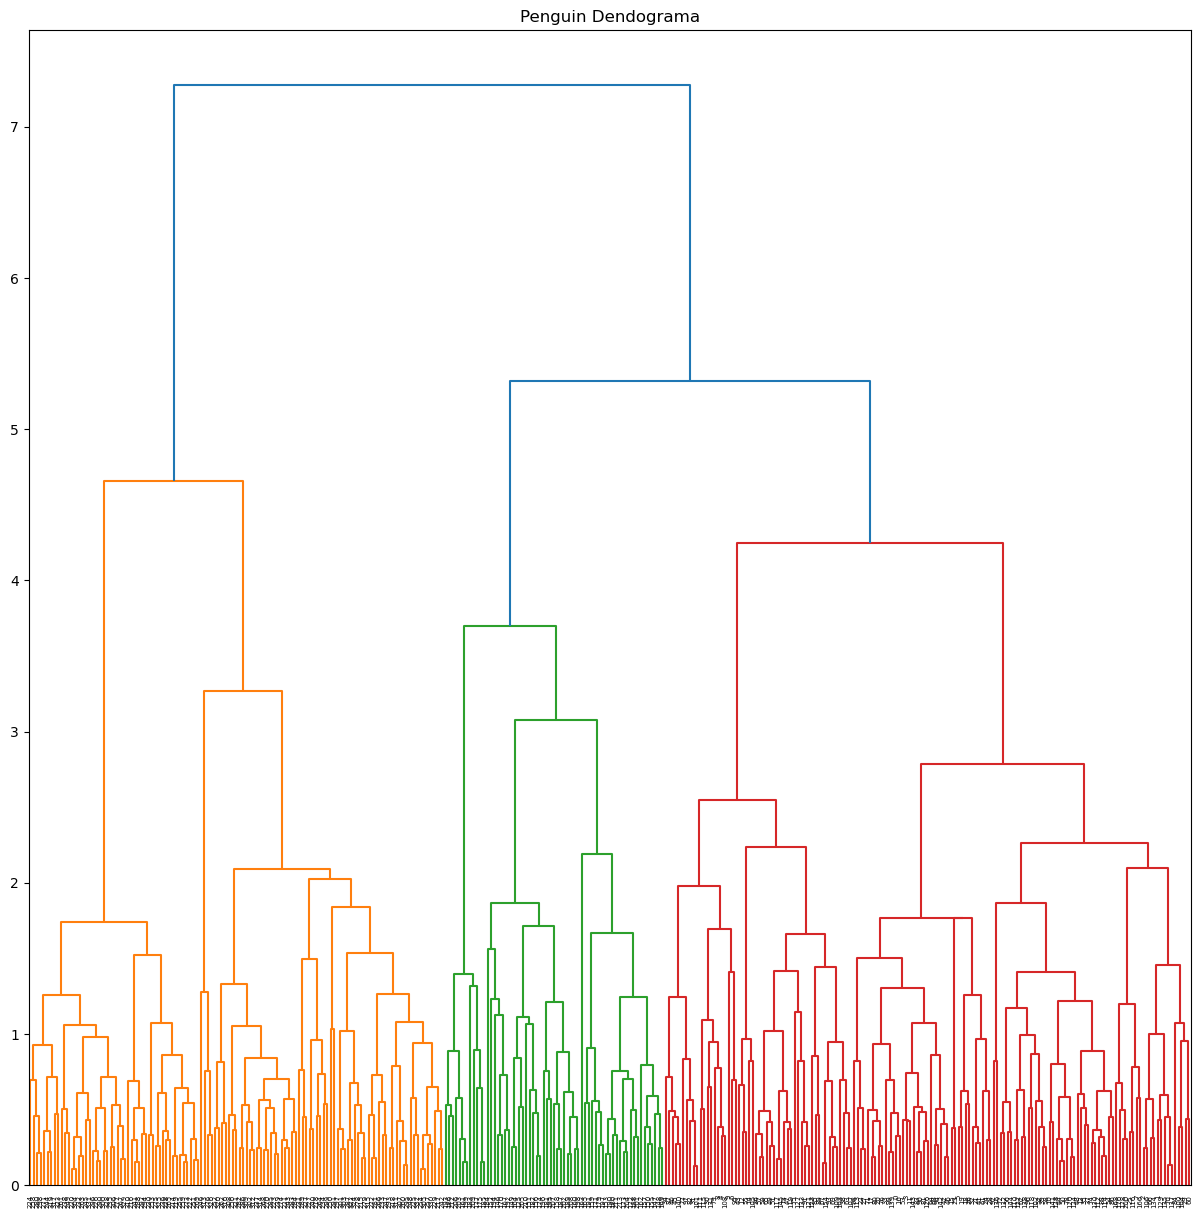

In [5]:
penguin = sns.load_dataset('penguins')
penguin = penguin.dropna()
df = penguin.select_dtypes('number')
df_pad = StandardScaler().fit_transform(df)

plt.figure(figsize=(15,15))
plt.title('Penguin Dendograma')
Z = shc.linkage(df_pad, method='complete')
dend = shc.dendrogram(Z)


## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

<Axes: xlabel='species', ylabel='clusters'>

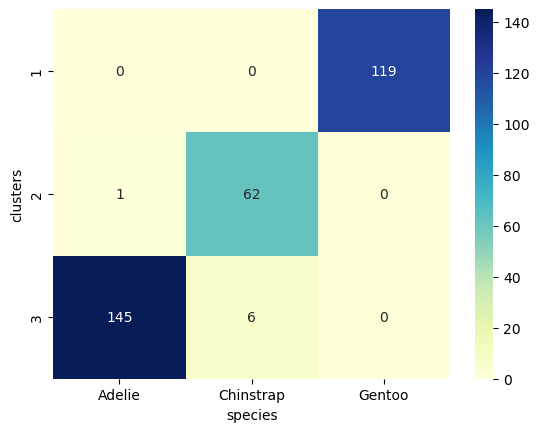

In [28]:
clusters = fcluster(Z, t=3, criterion='maxclust')
df['clusters'] = clusters
df['species'] = penguin['species']
tabela = pd.crosstab(df['clusters'], df['species'])
tabela

sns.heatmap(tabela, annot=True, cmap="YlGnBu", cbar=True, fmt="d")

# Como podemos ver, os penguins foram muito bem agrupados, sendo o único erro, um adelie que foi errôneamente classificado no grupo dos chainstrap's,
# Claro,isto considerando que nosso objetivo fosse dividir os penguins em espécies. Uma efetividade de quase 100%

##### Agora, vamos fazer uma análise descritiva de cada cluster com relação às variáveis quantitativas...

In [68]:
variaveis_n = list(df.select_dtypes('number').columns)

variaveis_n
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,clusters,species
0,39.1,18.7,181.0,3750.0,3,Adelie
1,39.5,17.4,186.0,3800.0,3,Adelie
2,40.3,18.0,195.0,3250.0,3,Adelie
4,36.7,19.3,193.0,3450.0,3,Adelie
5,39.3,20.6,190.0,3650.0,3,Adelie


In [123]:
df_cluster1 = pd.concat([dummie_clusters_df[variaveis_n], dummie_clusters_df['clusters_1']], axis=1)
df_cluster1.head()
dummie_clusters_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species,clusters_1,clusters_2,clusters_3
0,39.1,18.7,181.0,3750.0,Adelie,0,0,1
1,39.5,17.4,186.0,3800.0,Adelie,0,0,1
2,40.3,18.0,195.0,3250.0,Adelie,0,0,1
4,36.7,19.3,193.0,3450.0,Adelie,0,0,1
5,39.3,20.6,190.0,3650.0,Adelie,0,0,1


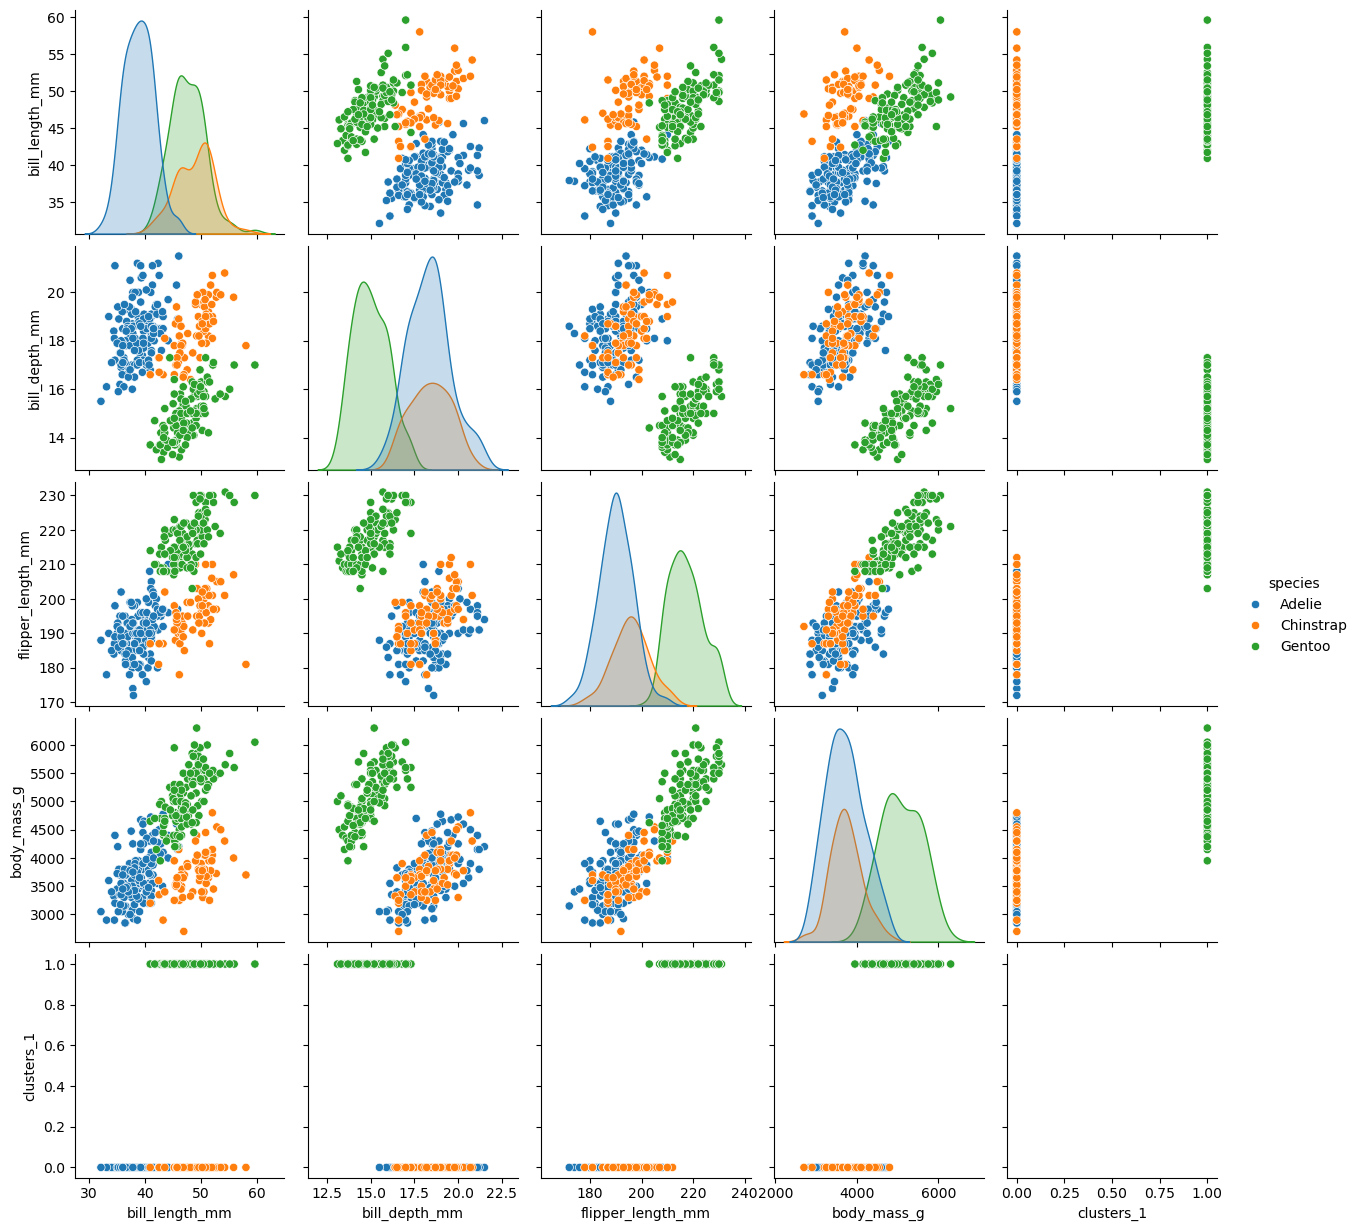

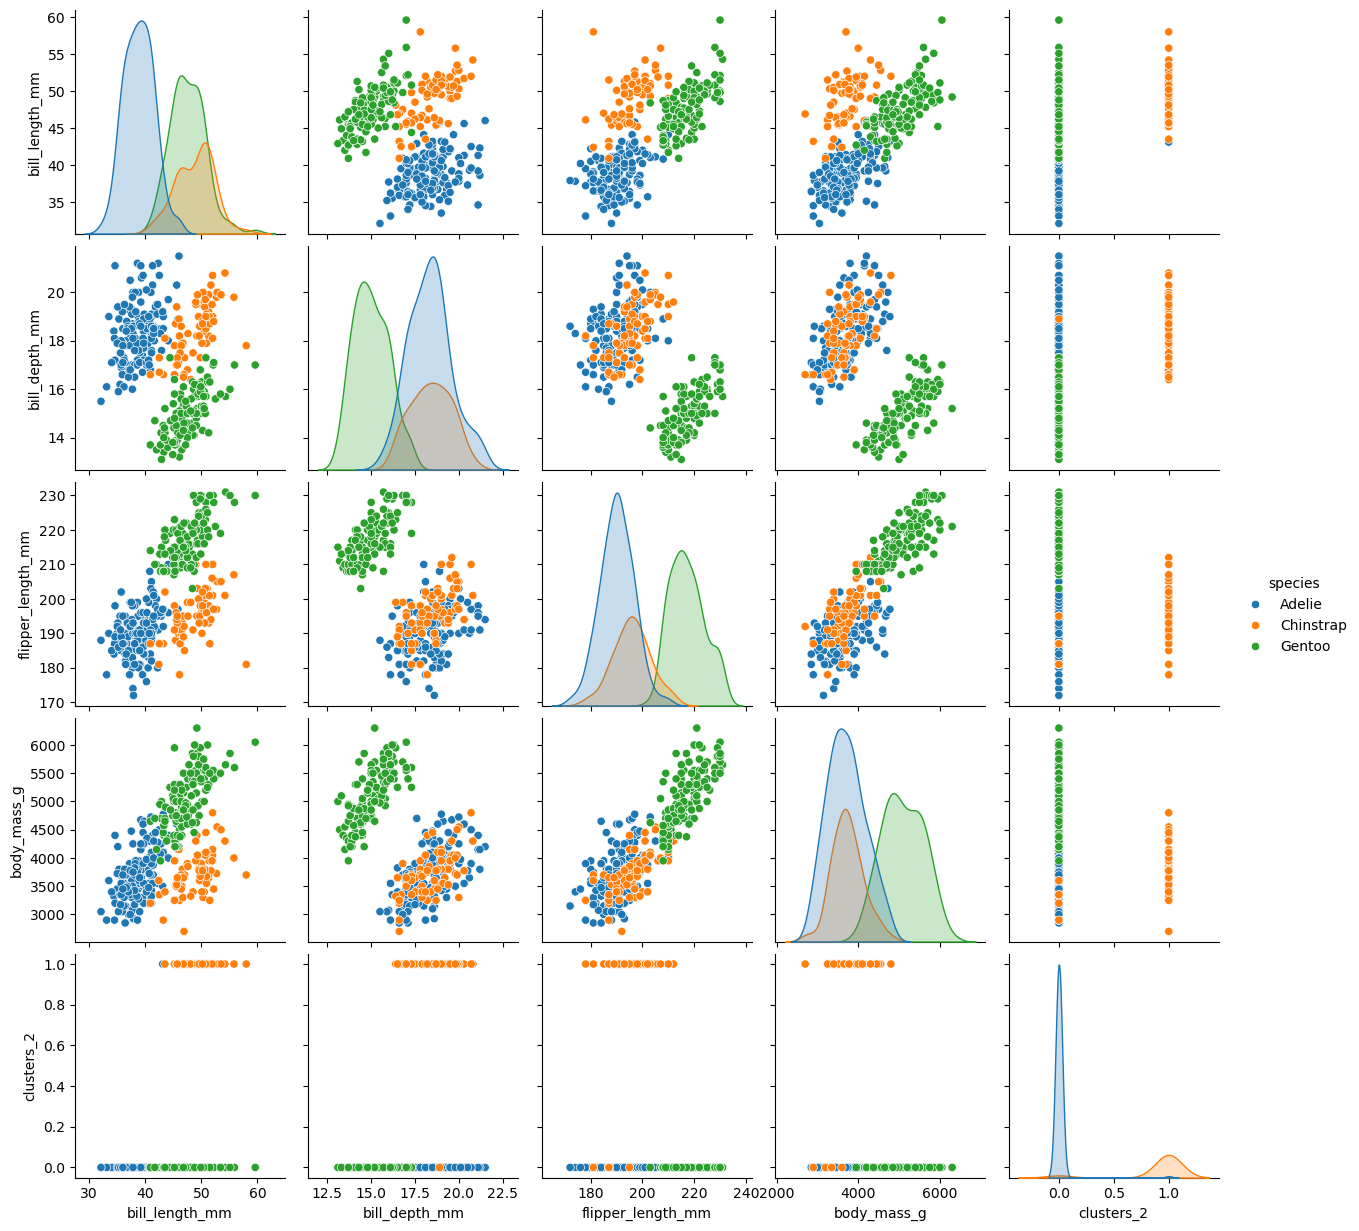

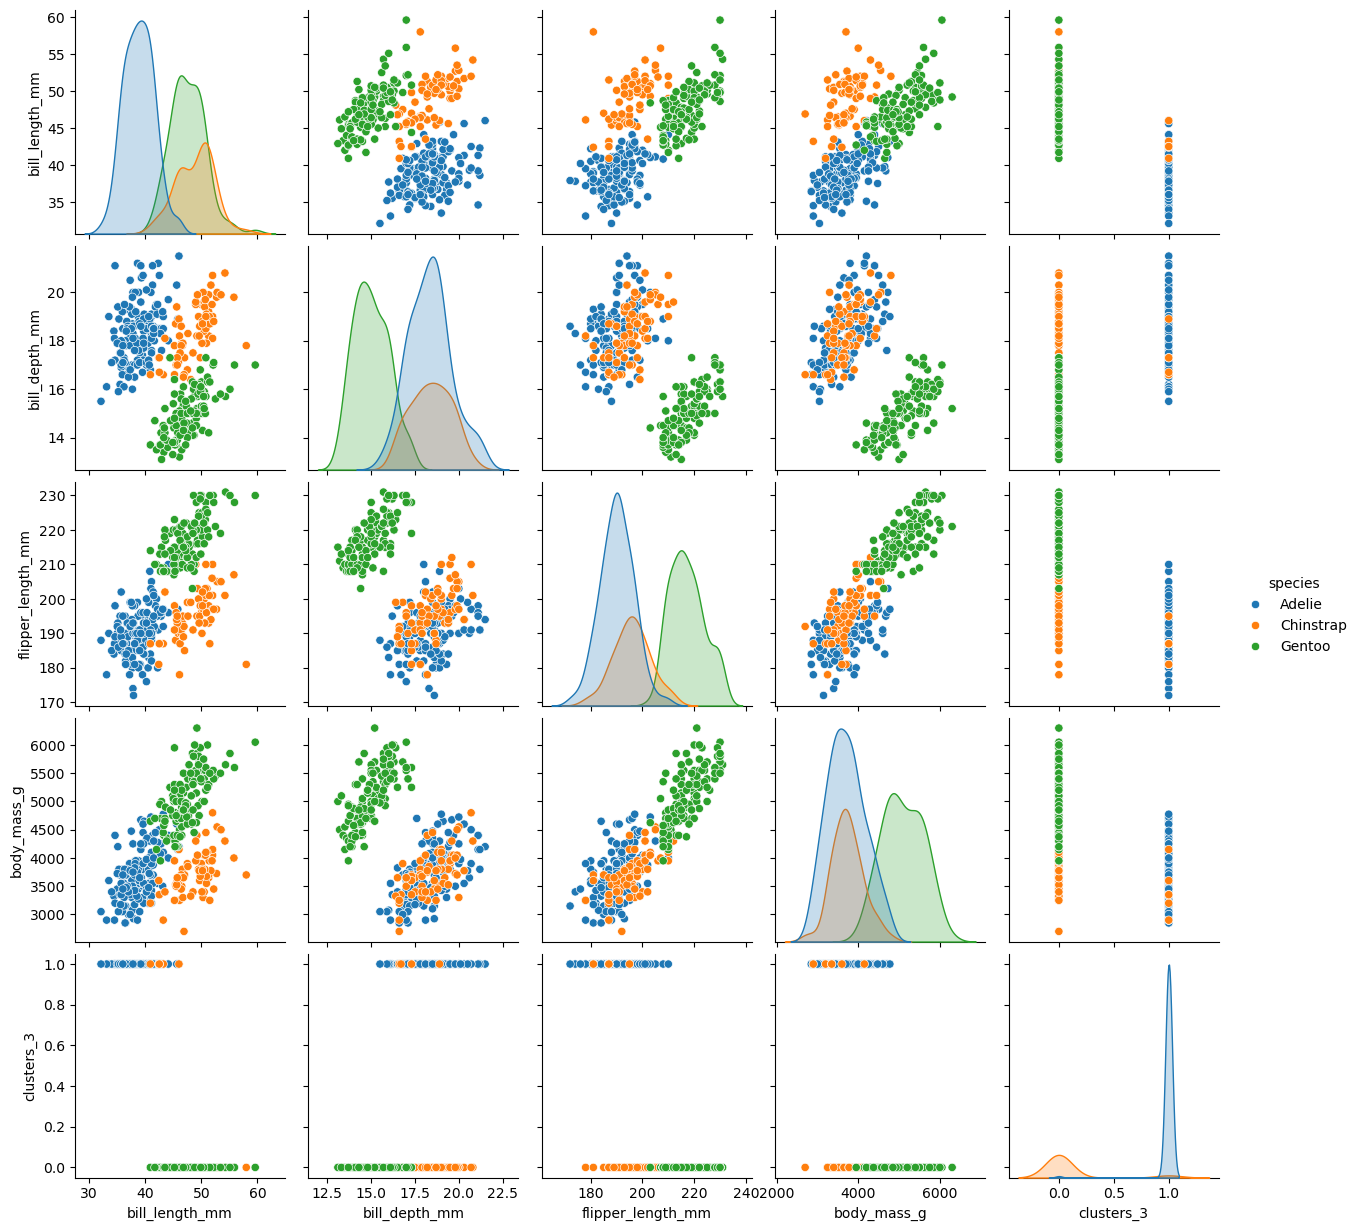

In [131]:
dummie_clusters_df = pd.get_dummies(df, columns=['clusters'], dtype=int)



# df_cluster1.head()
for c in range(0,3):
    data = pd.concat([dummie_clusters_df[variaveis_n], dummie_clusters_df[[('clusters_'+str(c+1)), 'species']]], axis=1)
    sns.pairplot(data=data, hue='species')
    print('\n \n \n \n')
    plt.show()
    data=None


#### Na célula acima, podemos ver como cada cluster se comporta com relação às variáveis qualitativas, e como cada espécie encontra-se classificada e situada com relação à cada cluster e onde cada espécie se encontra também com relação às características físicas dos pinguins, uma análise completa de todos os dados pertinentes à nossa análise.

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

## Um agrupamento super interessante possívelmente seria um agrupamento com 6 classes, isso porque, muito provavelmente, a divisão seria feita pelo gênero dos penguins, visto que, dentro da maioria das espécies do reino animal, existem grandes diferenças entre medidas corporais de indivíduos machos e fêmeas.

In [16]:
cluster6 = fcluster(Z, t=6, criterion='maxclust')
penguin['clusters6'] = cluster6

In [18]:
tabela_6s = pd.crosstab(penguin['clusters6'], penguin['species'])
tabela_6s



species,Adelie,Chinstrap,Gentoo
clusters6,,,
1,0,0,49
2,0,0,70
3,0,12,0
4,1,50,0
5,53,1,0
6,92,5,0


#### Conforme esperado, os penguins foram classificados em 6 grupos, com cada espécie se concentrando em 2 específicos, um que condense seus machos, e um que condense suas fêmeas. Alguns erros foram cometidos, e vamos fazer uma análise mais próxima para averiguar a distribuição de machos e fêmeas dentro de cada grupo específico. Mas, como podemos ver, não existem Gentoos fora do grupo 1, e apenas um adelie existe fora dos grupos 5 e 6. A espécie que causou mais confusão foi a Chainstrap.

In [34]:
penguin['clusters6'] = cluster6
penguin['speciegender'] = penguin['species'] + penguin['sex']
tabela_6g = pd.crosstab(penguin['clusters6'], penguin['speciegender'])
tabela_6g

speciegender,AdelieFemale,AdelieMale,ChinstrapFemale,ChinstrapMale,GentooFemale,GentooMale
clusters6,,,,,,
1,0,0,0,0,49,0
2,0,0,0,0,9,61
3,0,0,0,12,0,0
4,0,1,28,22,0,0
5,1,52,1,0,0,0
6,72,20,5,0,0,0


<Axes: xlabel='speciegender', ylabel='clusters6'>

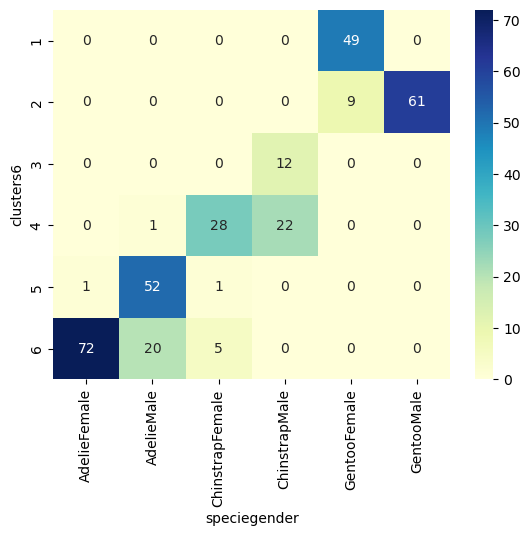

In [32]:
sns.heatmap(tabela_6g, annot=True, cmap="YlGnBu", cbar=True, fmt="d")


### Com esse lindo cluster map vemos que, com essa classificação, as fêmeas se concentraram nos grupos 1 e 6, com um certo grau de confusão nos indices 3 e 4. Isso, certamente, se deve ao fato de que essa espécie deve ter menos distinções de gênero dos penguins, conforme já haviamos suposto! De todo modo, ainda assim, todos os penguins do grupo 3 são machos, o que ainda mostra que, embora alguns machos pareçam com algumas fêmeas, certos machos ainda se distinguem da população de fêmeas o suficiente para serem classificados distintamente.